# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [74]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace spaces with %20 to create url correctly 
 
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []

# Starting URL for API call
url = 'http://api.openweathermap.org/data/2.5/forecast?'
# Starting URL for Weather Map API Call
record_count = 0

for city in cities:
    try:
        res = requests.get(f'{url}q={city}&APPID={api_key}').json()
       
        #res= requests.get(f"{link}={x}&appid={api_key}").json()
        city_name.append(res['city']['name'])
        cloudiness.append(res['list'][0]['clouds']['all'])
        country.append(res['city']['country'])
        date.append(res['list'][0]['dt'])
        humidity.append(res['list'][0]['main']['humidity'])
        lat.append(res['city']['coord']['lat'])
        lng.append(res['city']['coord']['lon'])
        temp_max.append(res['list'][0]['main']['temp_max'])
        wind_speed.append(res['list'][0]['wind']['speed'])
        record_count += 1
        print(f'Processing Record number {record_count} | {city}')
        print(f"{url}&q={city}")
         # API rate limit
        time.sleep(1.01)
   
    
    # Skip if no match found
    except:
        print(f"City not found: {city}. Skipping to next city")
    continue
    

dataset = pd.DataFrame({'City': city_name,
                            'Cloud': cloudiness,
                            'Country': country,
                            'Date': date,
                            'Humidity': humidity,
                            'Lat': lat,
                            'Lon': lng,
                            'Max Temp': temp_max,
                            'Wind Speed': wind_speed
                                                     })

Processing Record number 1 | butaritari
http://api.openweathermap.org/data/2.5/forecast?&q=butaritari
Processing Record number 2 | ushuaia
http://api.openweathermap.org/data/2.5/forecast?&q=ushuaia
Processing Record number 3 | okhotsk
http://api.openweathermap.org/data/2.5/forecast?&q=okhotsk
Processing Record number 4 | aden
http://api.openweathermap.org/data/2.5/forecast?&q=aden
Processing Record number 5 | souillac
http://api.openweathermap.org/data/2.5/forecast?&q=souillac
Processing Record number 6 | naze
http://api.openweathermap.org/data/2.5/forecast?&q=naze
Processing Record number 7 | rikitea
http://api.openweathermap.org/data/2.5/forecast?&q=rikitea
Processing Record number 8 | mahebourg
http://api.openweathermap.org/data/2.5/forecast?&q=mahebourg
Processing Record number 9 | busselton
http://api.openweathermap.org/data/2.5/forecast?&q=busselton
Processing Record number 10 | avarua
http://api.openweathermap.org/data/2.5/forecast?&q=avarua
Processing Record number 11 | tasiila

Processing Record number 79 | cape town
http://api.openweathermap.org/data/2.5/forecast?&q=cape town
Processing Record number 80 | chapais
http://api.openweathermap.org/data/2.5/forecast?&q=chapais
Processing Record number 81 | half moon bay
http://api.openweathermap.org/data/2.5/forecast?&q=half moon bay
Processing Record number 82 | qaanaaq
http://api.openweathermap.org/data/2.5/forecast?&q=qaanaaq
Processing Record number 83 | severo-kurilsk
http://api.openweathermap.org/data/2.5/forecast?&q=severo-kurilsk
Processing Record number 84 | klaksvik
http://api.openweathermap.org/data/2.5/forecast?&q=klaksvik
Processing Record number 85 | the valley
http://api.openweathermap.org/data/2.5/forecast?&q=the valley
Processing Record number 86 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/forecast?&q=tuktoyaktuk
Processing Record number 87 | faanui
http://api.openweathermap.org/data/2.5/forecast?&q=faanui
Processing Record number 88 | fort walton beach
http://api.openweathermap.org/data/

Processing Record number 157 | alice springs
http://api.openweathermap.org/data/2.5/forecast?&q=alice springs
Processing Record number 158 | coahuayana
http://api.openweathermap.org/data/2.5/forecast?&q=coahuayana
Processing Record number 159 | mar del plata
http://api.openweathermap.org/data/2.5/forecast?&q=mar del plata
Processing Record number 160 | reshetylivka
http://api.openweathermap.org/data/2.5/forecast?&q=reshetylivka
Processing Record number 161 | hong gai
http://api.openweathermap.org/data/2.5/forecast?&q=hong gai
Processing Record number 162 | rio cuarto
http://api.openweathermap.org/data/2.5/forecast?&q=rio cuarto
Processing Record number 163 | dikson
http://api.openweathermap.org/data/2.5/forecast?&q=dikson
Processing Record number 164 | las rosas
http://api.openweathermap.org/data/2.5/forecast?&q=las rosas
Processing Record number 165 | nikolskoye
http://api.openweathermap.org/data/2.5/forecast?&q=nikolskoye
Processing Record number 166 | shingu
http://api.openweatherma

Processing Record number 237 | richards bay
http://api.openweathermap.org/data/2.5/forecast?&q=richards bay
Processing Record number 238 | north bend
http://api.openweathermap.org/data/2.5/forecast?&q=north bend
Processing Record number 239 | morant bay
http://api.openweathermap.org/data/2.5/forecast?&q=morant bay
City not found: mocambique. Skipping to next city
City not found: mrirt. Skipping to next city
Processing Record number 240 | acari
http://api.openweathermap.org/data/2.5/forecast?&q=acari
Processing Record number 241 | aklavik
http://api.openweathermap.org/data/2.5/forecast?&q=aklavik
Processing Record number 242 | sorong
http://api.openweathermap.org/data/2.5/forecast?&q=sorong
Processing Record number 243 | oranjemund
http://api.openweathermap.org/data/2.5/forecast?&q=oranjemund
City not found: parras. Skipping to next city
Processing Record number 244 | tursunzoda
http://api.openweathermap.org/data/2.5/forecast?&q=tursunzoda
Processing Record number 245 | amapa
http://api

City not found: tarudant. Skipping to next city
Processing Record number 314 | gberia fotombu
http://api.openweathermap.org/data/2.5/forecast?&q=gberia fotombu
Processing Record number 315 | hobyo
http://api.openweathermap.org/data/2.5/forecast?&q=hobyo
City not found: berbera. Skipping to next city
Processing Record number 316 | bilma
http://api.openweathermap.org/data/2.5/forecast?&q=bilma
Processing Record number 317 | qeshm
http://api.openweathermap.org/data/2.5/forecast?&q=qeshm
Processing Record number 318 | ostrovnoy
http://api.openweathermap.org/data/2.5/forecast?&q=ostrovnoy
Processing Record number 319 | moerai
http://api.openweathermap.org/data/2.5/forecast?&q=moerai
Processing Record number 320 | butler
http://api.openweathermap.org/data/2.5/forecast?&q=butler
Processing Record number 321 | daru
http://api.openweathermap.org/data/2.5/forecast?&q=daru
City not found: vaitupu. Skipping to next city
Processing Record number 322 | los llanos de aridane
http://api.openweathermap

Processing Record number 391 | salyan
http://api.openweathermap.org/data/2.5/forecast?&q=salyan
Processing Record number 392 | mount isa
http://api.openweathermap.org/data/2.5/forecast?&q=mount isa
Processing Record number 393 | kawalu
http://api.openweathermap.org/data/2.5/forecast?&q=kawalu
Processing Record number 394 | hervey bay
http://api.openweathermap.org/data/2.5/forecast?&q=hervey bay
Processing Record number 395 | caravelas
http://api.openweathermap.org/data/2.5/forecast?&q=caravelas
Processing Record number 396 | tiznit
http://api.openweathermap.org/data/2.5/forecast?&q=tiznit
Processing Record number 397 | kloulklubed
http://api.openweathermap.org/data/2.5/forecast?&q=kloulklubed
Processing Record number 398 | san patricio
http://api.openweathermap.org/data/2.5/forecast?&q=san patricio
Processing Record number 399 | guiberoua
http://api.openweathermap.org/data/2.5/forecast?&q=guiberoua
Processing Record number 400 | kundiawa
http://api.openweathermap.org/data/2.5/forecast?

Processing Record number 468 | tezu
http://api.openweathermap.org/data/2.5/forecast?&q=tezu
Processing Record number 469 | taoudenni
http://api.openweathermap.org/data/2.5/forecast?&q=taoudenni
Processing Record number 470 | bandarbeyla
http://api.openweathermap.org/data/2.5/forecast?&q=bandarbeyla
Processing Record number 471 | goderich
http://api.openweathermap.org/data/2.5/forecast?&q=goderich
Processing Record number 472 | broken hill
http://api.openweathermap.org/data/2.5/forecast?&q=broken hill
City not found: umzimvubu. Skipping to next city
Processing Record number 473 | luangwa
http://api.openweathermap.org/data/2.5/forecast?&q=luangwa
Processing Record number 474 | lincoln
http://api.openweathermap.org/data/2.5/forecast?&q=lincoln
Processing Record number 475 | berdigestyakh
http://api.openweathermap.org/data/2.5/forecast?&q=berdigestyakh
Processing Record number 476 | tuatapere
http://api.openweathermap.org/data/2.5/forecast?&q=tuatapere
Processing Record number 477 | newpor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
dataset.to_csv('../Output/WeatherPyOutput.csv')

In [77]:
dataset

City  Cloud Country        Date  Humidity      Lat       Lon  \
0        Butaritari     96      KI  1567468800        72   3.0707  172.7902   
1           Ushuaia    100      AR  1567468800        97 -54.8070  -68.3074   
2           Okhotsk     80      RU  1567468800        60  59.3644  143.2411   
3              Aden     64      YE  1567468800        46  12.7896   45.0285   
4          Souillac      2      FR  1567468800        51  45.6006   -0.6000   
5              Naze    100      NG  1567468800        96   5.4333    7.0667   
6           Rikitea    100      PF  1567468800        85 -23.1203 -134.9692   
7         Mahebourg      0      MU  1567468800        72 -20.4081   57.7000   
8         Busselton     27      AU  1567468800        58 -33.6445  115.3489   
9            Avarua     44      CK  1567468800        60 -21.2078 -159.7750   
10         Tasiilaq     77      GL  1567468800        59  65.6145  -37.6368   
11     Punta Arenas     78      CL  1567468800        74 -53.1627  -70.9081   
12         Hermanus      0      ZA  1567468800        78 -34.4176   19.2361   
13            Timra     53      SE  1567468800        87  62.4870   17.3257   
14         Harboore     76      DK  1567468800        87  56.6175    8.1807   
15             Kaeo    100      NZ  1567468800        95 -35.1018  173.7751   
16          Honiara     68      SB  1567468800        73  -9.4313  159.9553   
17        Jamestown      4      AU  1567468800        75 -33.2075  138.6035   
18           Lompoc      2      US  1567468800        55  34.6392 -120.4580   
19   Saint-Philippe     78      CA  1567468800        70  45.3584  -73.4791   
20      East London     37      ZA  1567468800        91 -33.0153   27.9116   
21       Charleston     12      US  1567468800        79  32.7876  -79.9403   
22           Hailar     95      CN  1567468800        74  49.2000  119.7000   
23          Isangel     93      VU  1567468800        90 -19.5500  169.2667   
24         Luderitz      9      NA  1567468800        46 -26.6481   15.1594   
25           Namibe     57      AO  1567468800        86 -15.1902   12.1531   
26           Atuona     13      PF  1567468800        68  -9.8000 -139.0334   
27           Kodiak     40      US  1567468800        84  39.9519  -94.7572   
28         Kosonsoy      1      UZ  1567468800        68  41.2521   71.5452   
29     Saint George     31      GR  1567468800        64  39.4548   22.3400   
..              ...    ...     ...         ...       ...      ...       ...   
510      Canon City     82      US  1567479600        34  39.4566 -117.1293   
511            Suez      0      EG  1567479600        85  29.9745   32.5371   
512   Prince Rupert     73      CA  1567479600        76  54.3161 -130.3202   
513         Macheng     23      CN  1567479600        67  31.1789  115.0302   
514      Rudnogorsk     95      RU  1567479600        62  57.2683  103.7506   
515    Saint-Pierre      0      FR  1567479600        69  48.9455    4.2446   
516          Tiarei    100      PF  1567479600        85 -17.5334 -149.3334   
517         Lisburn     91      GB  1567479600        90  54.5129   -6.0354   
518           Cervo     79      BR  1567479600        72 -22.1856  -46.2383   
519          Yongan      1      CN  1567479600        31  39.6957  113.6871   
520        Buchanan     96      LR  1567479600        89   5.8813  -10.0495   
521        Nichinan     18      JP  1567479600        64  31.6476  131.3148   
522      Sao Filipe     74      CV  1567479600        86  14.8961  -24.4956   
523      Alexandria     99      RO  1567479600        51  43.9702   25.3288   
524          Bonthe     78      SL  1567479600        92   7.5273  -12.5020   
525          Anadyr    100      RU  1567479600        48  64.7317  177.5061   
526     Aleksandrov      0      RU  1567479600        92  56.4000   38.7100   
527        Tuskegee      0      US  1567479600        70  32.4240  -85.6917   
528           Avera      0      US  1567479600        71  33.1940

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

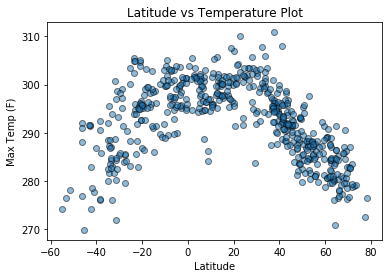

In [78]:
# Gather Columns
x1 = dataset['Lat']
y1 = dataset['Max Temp']

# Create Plot
plt.scatter(x1, y1, marker="o", edgecolor="black", alpha=0.50)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save Figure
plt.savefig("../Images/latlvstemp.png")

plt.show()

#### Latitude vs. Humidity Plot

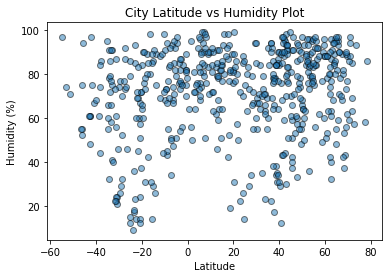

In [79]:

# Gather Columns
y2 = dataset['Humidity']

# Create Plot
plt.scatter(x1, y2, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig("../Images/latvshum.png")

plt.show()

#### Latitude vs. Cloudiness Plot

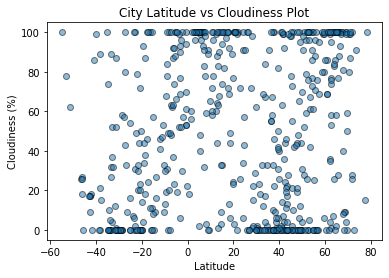

In [80]:
# Gather Columns
y3 = dataset['Cloud']


# Create Plot
plt.scatter(x1, y3, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save Figure
plt.savefig("../Images/latvscloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

In [81]:
#Gather Columns
y4 = dataset['Wind Speed']

# Create plot
plt.scatter(x1, y4, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')


# Save Figure
plt.savefig("../Images/latvs.png")

plt.show()
